## Convergence for Gaussians

In [1]:
%load_ext autoreload
%autoreload 2
import pickle 
import numpy as np
import time
import matplotlib.pyplot as plt
random_seed = 5

from pnot.utils import adapted_wasserstein_squared, matrixL2paths
from pnot import nested_ot

## Markovian case

L = 
[[1 0 0 0]
 [2 2 0 0]
 [2 2 3 0]
 [2 2 3 2]]
M = 
[[1 0 0 0]
 [2 1 0 0]
 [2 1 1 0]
 [2 1 1 1]]
Theoretical AW_2^2:  12.0


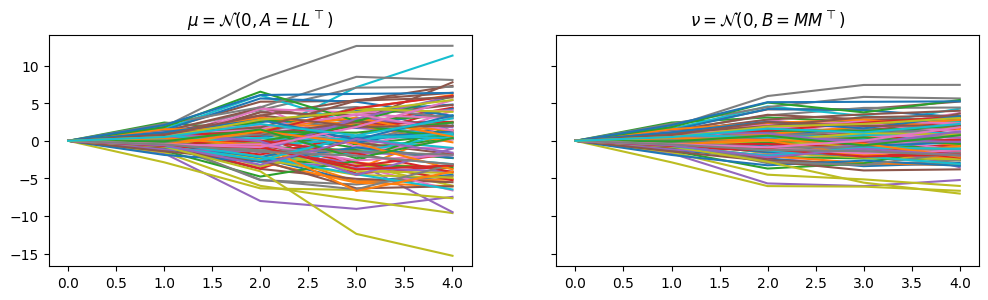

In [2]:
L = np.array([[1, 0, 0, 0],
              [2, 2, 0, 0],
              [2, 2, 3, 0],
              [2, 2, 3, 2]])

M = np.array([[1, 0, 0, 0],
              [2, 1, 0, 0],
              [2, 1, 1, 0],
              [2, 1, 1, 1]])

X ,A = matrixL2paths(L, 100, seed = random_seed)
print('L = ')
print(L)

Y,B = matrixL2paths(M, 100, seed = random_seed)
print('M = ')
print(M)

awd2square = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", awd2square)

fig, ax = plt.subplots(1,2, figsize = [12,3], sharey=True)
ax[0].plot(X[:,:100])
ax[1].plot(Y[:,:100])
ax[0].set_title(r'$\mu = \mathcal{N}(0,A = LL^\top)$')
ax[1].set_title(r'$\nu = \mathcal{N}(0,B = MM^\top)$')
plt.show()

In [3]:
T = 4
d = 1
sample_sizes = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]
grid_sizes = [n**(-1/d/T) for n in sample_sizes]
n_runs = 5

top_seed = 42  # Set this to any fixed integer for reproducibility
rng = np.random.default_rng(top_seed)

results = {}

for n_sample, grid_size in zip(sample_sizes, grid_sizes):
    distances_runs = np.zeros(n_runs)
    times_runs = np.zeros(n_runs)

    print(f"\nRunning experiments for sample size: {n_sample}")

    for run in range(n_runs):
        seed1 = rng.integers(0, 10000)
        
        # Generate sample paths
        X, A = matrixL2paths(L, n_sample, seed=seed1)
        Y, B = matrixL2paths(M, n_sample, seed=seed1)

        t_start = time.perf_counter()
        AW_2square = nested_ot(X, Y, grid_size, markovian = True, num_threads=800) # number of threads very dependent on the machine (here 42 core AMD cpu) and not sure optimal here
        elapsed = time.perf_counter() - t_start

        distances_runs[run] = AW_2square
        times_runs[run] = elapsed

        print(f"Sample size {n_sample}, Run {run+1}: AW_2^2 = {AW_2square:.4f}, Time = {elapsed:.4f} s")

    results[n_sample] = {"distances": distances_runs,
                         "times": times_runs,
                         "benchmark": awd2square}
    
with open('results/markovian_samples.pkl', 'wb') as f:
    pickle.dump(results, f)


Running experiments for sample size: 1000
Sample size 1000, Run 1: AW_2^2 = 14.3856, Time = 0.1572 s
Sample size 1000, Run 2: AW_2^2 = 13.5851, Time = 0.1189 s
Sample size 1000, Run 3: AW_2^2 = 12.7772, Time = 0.1403 s
Sample size 1000, Run 4: AW_2^2 = 13.8409, Time = 0.1332 s
Sample size 1000, Run 5: AW_2^2 = 12.9332, Time = 0.1417 s

Running experiments for sample size: 2000
Sample size 2000, Run 1: AW_2^2 = 12.9461, Time = 0.1406 s
Sample size 2000, Run 2: AW_2^2 = 13.4245, Time = 0.1374 s
Sample size 2000, Run 3: AW_2^2 = 13.1738, Time = 0.1338 s
Sample size 2000, Run 4: AW_2^2 = 13.0873, Time = 0.1604 s
Sample size 2000, Run 5: AW_2^2 = 12.5694, Time = 0.1761 s

Running experiments for sample size: 4000
Sample size 4000, Run 1: AW_2^2 = 13.5274, Time = 0.3111 s
Sample size 4000, Run 2: AW_2^2 = 13.0911, Time = 0.3093 s
Sample size 4000, Run 3: AW_2^2 = 13.0737, Time = 0.3420 s
Sample size 4000, Run 4: AW_2^2 = 13.0763, Time = 0.3818 s
Sample size 4000, Run 5: AW_2^2 = 13.0681, Ti


Aggregated Results:
Sample Size: 1000
  Mean AW_2^2: 13.5044 ± 0.5918
  Mean Time: 0.1383 s ± 0.0125 s
  Mean Absolute Error: 1.5044 ± 0.5918
  Benchmark: 12.0000

Sample Size: 2000
  Mean AW_2^2: 13.0402 ± 0.2822
  Mean Time: 0.1497 s ± 0.0161 s
  Mean Absolute Error: 1.0402 ± 0.2822
  Benchmark: 12.0000

Sample Size: 4000
  Mean AW_2^2: 13.1673 ± 0.1802
  Mean Time: 0.3344 s ± 0.0265 s
  Mean Absolute Error: 1.1673 ± 0.1802
  Benchmark: 12.0000

Sample Size: 8000
  Mean AW_2^2: 12.7752 ± 0.2538
  Mean Time: 0.8562 s ± 0.0714 s
  Mean Absolute Error: 0.7752 ± 0.2538
  Benchmark: 12.0000

Sample Size: 16000
  Mean AW_2^2: 12.4107 ± 0.0912
  Mean Time: 2.0279 s ± 0.0620 s
  Mean Absolute Error: 0.4107 ± 0.0912
  Benchmark: 12.0000

Sample Size: 32000
  Mean AW_2^2: 12.3181 ± 0.1289
  Mean Time: 1.6645 s ± 1.5797 s
  Mean Absolute Error: 0.3181 ± 0.1289
  Benchmark: 12.0000

Sample Size: 64000
  Mean AW_2^2: 12.1229 ± 0.0598
  Mean Time: 2.1877 s ± 0.0345 s
  Mean Absolute Error: 0.1229

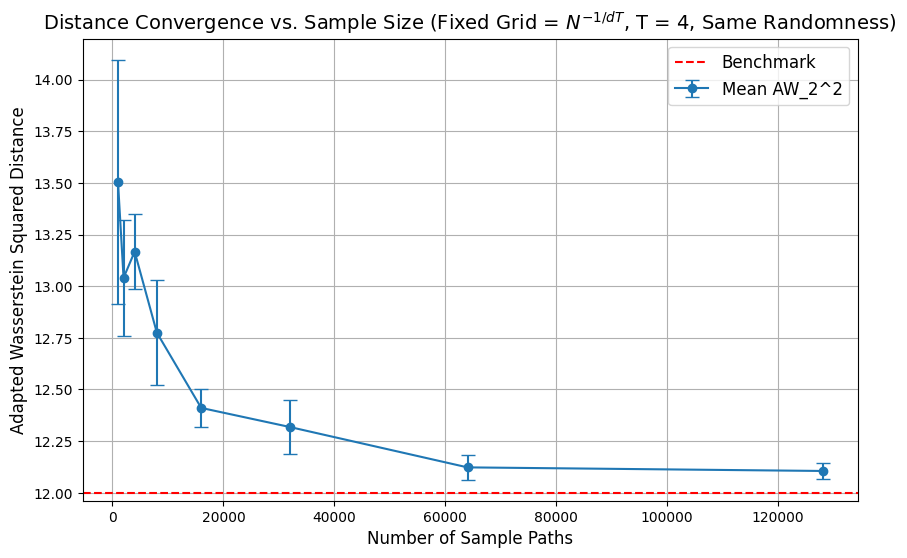

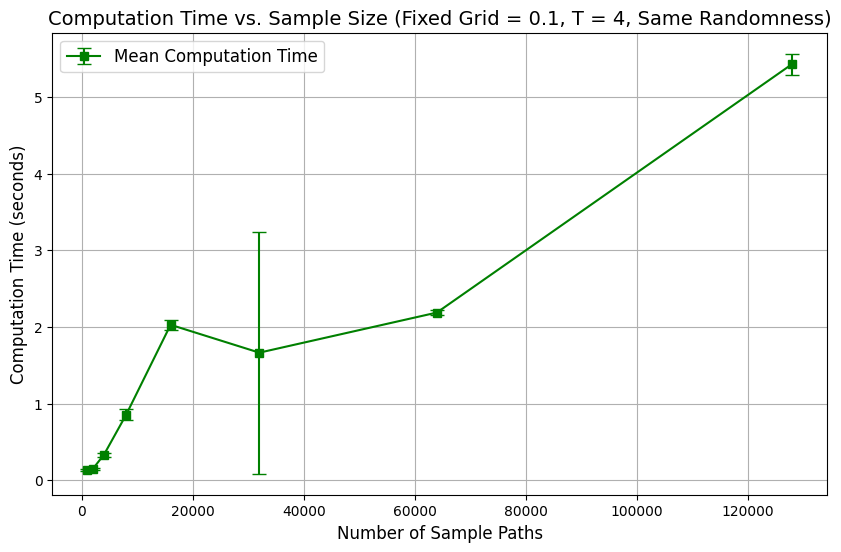

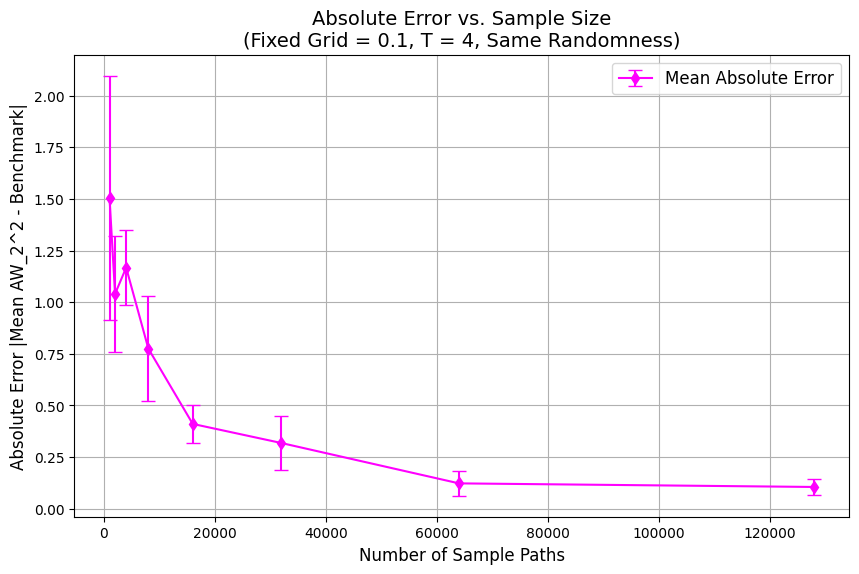

In [4]:
print("\nAggregated Results:")
aggregated = {}
for n_sample in sorted(results.keys()):
    data = results[n_sample]
    dists = data["distances"]
    times = data["times"]
    bench = data["benchmark"]
    mean_dist = np.mean(dists)
    std_dist = np.std(dists)
    mean_time = np.mean(times)
    std_time = np.std(times)
    abs_errors = np.abs(dists - bench)
    mean_abs_err = np.mean(abs_errors)
    std_abs_err = np.std(abs_errors)
    aggregated[n_sample] = {
        "mean_distance": mean_dist,
        "std_distance": std_dist,
        "mean_time": mean_time,
        "std_time": std_time,
        "mean_abs_error": mean_abs_err,
        "std_abs_error": std_abs_err,
        "benchmark": bench
    }
    print(f"Sample Size: {n_sample}")
    print(f"  Mean AW_2^2: {mean_dist:.4f} ± {std_dist:.4f}")
    print(f"  Mean Time: {mean_time:.4f} s ± {std_time:.4f} s")
    print(f"  Mean Absolute Error: {mean_abs_err:.4f} ± {std_abs_err:.4f}")
    print(f"  Benchmark: {bench:.4f}\n")


sample_list = sorted(aggregated.keys())
mean_distances = [aggregated[n]["mean_distance"] for n in sample_list]
std_distances = [aggregated[n]["std_distance"] for n in sample_list]
mean_times = [aggregated[n]["mean_time"] for n in sample_list]
std_times = [aggregated[n]["std_time"] for n in sample_list]
mean_abs_errors = [aggregated[n]["mean_abs_error"] for n in sample_list]
std_abs_errors = [aggregated[n]["std_abs_error"] for n in sample_list]
benchmark = aggregated[sample_list[0]]["benchmark"]  # assuming benchmark is the same across sizes

# Plot 1: Distance Convergence
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_distances, yerr=std_distances, fmt="o-", capsize=5, label="Mean AW_2^2")
plt.axhline(y=benchmark, color="red", linestyle="--", label="Benchmark")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Adapted Wasserstein Squared Distance", fontsize=12)
plt.title(r"Distance Convergence vs. Sample Size (Fixed Grid = $N^{-1/dT}$, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: Computation Time
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_times, yerr=std_times, fmt="s-", capsize=5, color="green", label="Mean Computation Time")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Computation Time (seconds)", fontsize=12)
plt.title("Computation Time vs. Sample Size (Fixed Grid = 0.1, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot 3: Absolute Error
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_abs_errors, yerr=std_abs_errors, fmt="d-", capsize=5, color="magenta", label="Mean Absolute Error")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Absolute Error |Mean AW_2^2 - Benchmark|", fontsize=12)
plt.title("Absolute Error vs. Sample Size\n(Fixed Grid = 0.1, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Non-Markovian case

L = 
[[1 0 0 0]
 [2 2 0 0]
 [1 1 3 0]
 [2 2 1 2]]
M = 
[[1 0 0 0]
 [2 1 0 0]
 [3 2 1 0]
 [4 3 2 1]]
Theoretical AW_2^2:  17.0


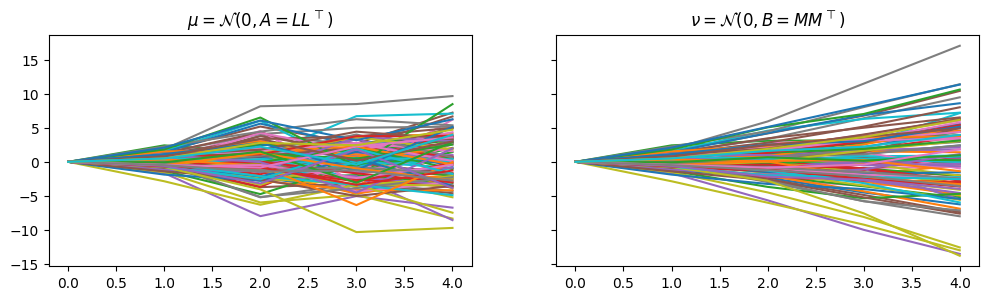

In [2]:
L = np.array([[1, 0, 0, 0],
              [2, 2, 0, 0],
              [1, 1, 3, 0],
              [2, 2, 1, 2]])

M = np.array([[1, 0, 0, 0],
              [2, 1, 0, 0],
              [3, 2, 1, 0],
              [4, 3, 2, 1]])

X ,A = matrixL2paths(L, 100, seed = random_seed)
print('L = ')
print(L)

Y,B = matrixL2paths(M, 100, seed = random_seed)
print('M = ')
print(M)

awd2square = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", awd2square)

fig, ax = plt.subplots(1,2, figsize = [12,3], sharey=True)
ax[0].plot(X[:,:100])
ax[1].plot(Y[:,:100])
ax[0].set_title(r'$\mu = \mathcal{N}(0,A = LL^\top)$')
ax[1].set_title(r'$\nu = \mathcal{N}(0,B = MM^\top)$')
plt.show()

In [3]:
T = 4
d = 1
sample_sizes = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
grid_sizes = [n**(-1/d/T) for n in sample_sizes]
n_runs = 5

top_seed = 42  # Set this to any fixed integer for reproducibility
rng = np.random.default_rng(top_seed)

results = {}

for n_sample, grid_size in zip(sample_sizes, grid_sizes):
    distances_runs = np.zeros(n_runs)
    times_runs = np.zeros(n_runs)

    print(f"\nRunning experiments for sample size: {n_sample}")

    for run in range(n_runs):
        seed1 = rng.integers(0, 10000)
        
        # Generate sample paths
        X, A = matrixL2paths(L, n_sample, seed=seed1)
        Y, B = matrixL2paths(M, n_sample, seed=seed1)

        t_start = time.perf_counter()
        AW_2square = nested_ot(X, Y, grid_size, markovian = False, num_threads=800) # number of threads very dependent on the machine (here 42 core AMD cpu) and not sure optimal here
        elapsed = time.perf_counter() - t_start

        distances_runs[run] = AW_2square
        times_runs[run] = elapsed

        print(f"Sample size {n_sample}, Run {run+1}: AW_2^2 = {AW_2square:.4f}, Time = {elapsed:.4f} s")

    results[n_sample] = {"distances": distances_runs,
                         "times": times_runs,
                         "benchmark": awd2square}
    
with open('results/markovian_samples.pkl', 'wb') as f:
    pickle.dump(results, f)


Running experiments for sample size: 1000
Sample size 1000, Run 1: AW_2^2 = 17.8447, Time = 0.2303 s
Sample size 1000, Run 2: AW_2^2 = 18.2976, Time = 0.1327 s
Sample size 1000, Run 3: AW_2^2 = 17.5366, Time = 0.1266 s
Sample size 1000, Run 4: AW_2^2 = 17.9164, Time = 0.1348 s
Sample size 1000, Run 5: AW_2^2 = 18.1931, Time = 0.0957 s

Running experiments for sample size: 2000
Sample size 2000, Run 1: AW_2^2 = 17.2417, Time = 0.5642 s
Sample size 2000, Run 2: AW_2^2 = 18.5634, Time = 0.2873 s
Sample size 2000, Run 3: AW_2^2 = 18.7005, Time = 0.2925 s
Sample size 2000, Run 4: AW_2^2 = 18.1154, Time = 0.2865 s
Sample size 2000, Run 5: AW_2^2 = 18.1303, Time = 0.2436 s

Running experiments for sample size: 4000
Sample size 4000, Run 1: AW_2^2 = 18.0365, Time = 0.8797 s
Sample size 4000, Run 2: AW_2^2 = 18.2717, Time = 0.8835 s
Sample size 4000, Run 3: AW_2^2 = 18.2724, Time = 0.8692 s
Sample size 4000, Run 4: AW_2^2 = 18.0836, Time = 0.9039 s
Sample size 4000, Run 5: AW_2^2 = 18.1249, Ti


Aggregated Results:
Sample Size: 1000
  Mean AW_2^2: 17.9577 ± 0.2693
  Mean Time: 0.1440 s ± 0.0454 s
  Mean Absolute Error: 0.9577 ± 0.2693
  Benchmark: 17.0000

Sample Size: 2000
  Mean AW_2^2: 18.1503 ± 0.5100
  Mean Time: 0.3348 s ± 0.1160 s
  Mean Absolute Error: 1.1503 ± 0.5100
  Benchmark: 17.0000

Sample Size: 4000
  Mean AW_2^2: 18.1578 ± 0.0974
  Mean Time: 0.8976 s ± 0.0294 s
  Mean Absolute Error: 1.1578 ± 0.0974
  Benchmark: 17.0000

Sample Size: 8000
  Mean AW_2^2: 17.9193 ± 0.1187
  Mean Time: 2.6070 s ± 0.0829 s
  Mean Absolute Error: 0.9193 ± 0.1187
  Benchmark: 17.0000

Sample Size: 16000
  Mean AW_2^2: 17.8736 ± 0.0797
  Mean Time: 10.1878 s ± 1.6437 s
  Mean Absolute Error: 0.8736 ± 0.0797
  Benchmark: 17.0000

Sample Size: 32000
  Mean AW_2^2: 17.6684 ± 0.1333
  Mean Time: 30.9317 s ± 2.2513 s
  Mean Absolute Error: 0.6684 ± 0.1333
  Benchmark: 17.0000

Sample Size: 64000
  Mean AW_2^2: 17.4882 ± 0.0681
  Mean Time: 126.9300 s ± 2.6978 s
  Mean Absolute Error: 0.

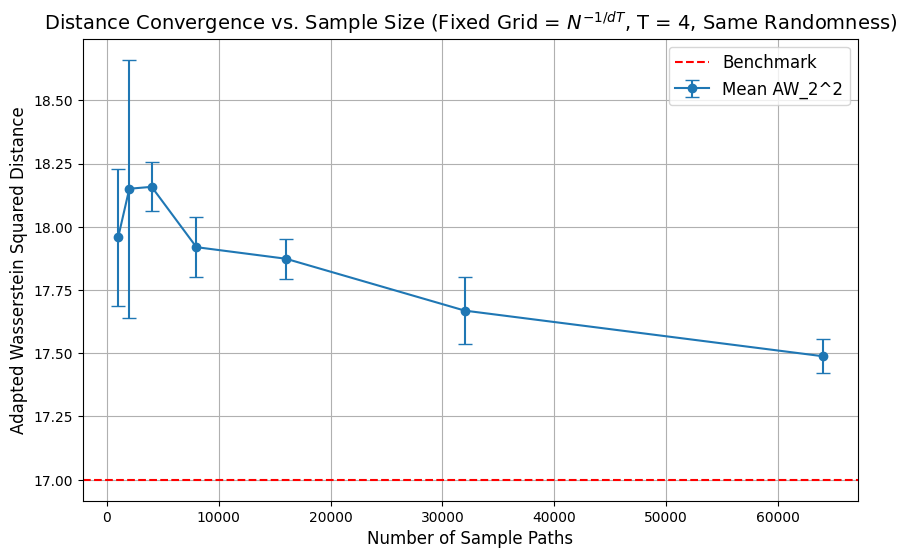

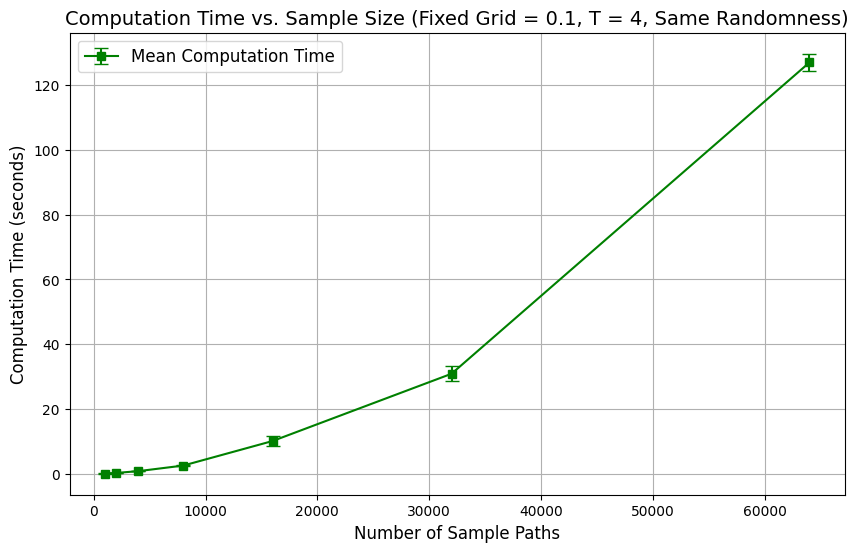

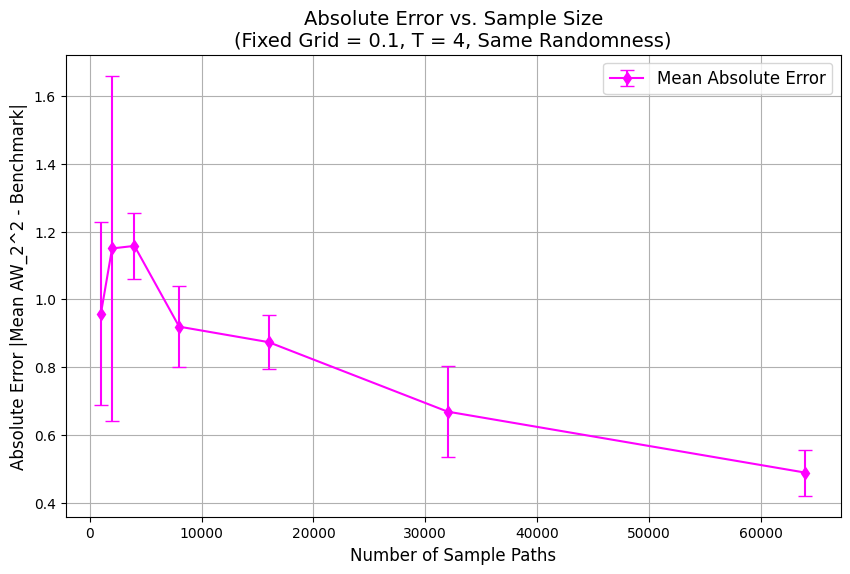

In [4]:
print("\nAggregated Results:")
aggregated = {}
for n_sample in sorted(results.keys()):
    data = results[n_sample]
    dists = data["distances"]
    times = data["times"]
    bench = data["benchmark"]
    mean_dist = np.mean(dists)
    std_dist = np.std(dists)
    mean_time = np.mean(times)
    std_time = np.std(times)
    abs_errors = np.abs(dists - bench)
    mean_abs_err = np.mean(abs_errors)
    std_abs_err = np.std(abs_errors)
    aggregated[n_sample] = {
        "mean_distance": mean_dist,
        "std_distance": std_dist,
        "mean_time": mean_time,
        "std_time": std_time,
        "mean_abs_error": mean_abs_err,
        "std_abs_error": std_abs_err,
        "benchmark": bench
    }
    print(f"Sample Size: {n_sample}")
    print(f"  Mean AW_2^2: {mean_dist:.4f} ± {std_dist:.4f}")
    print(f"  Mean Time: {mean_time:.4f} s ± {std_time:.4f} s")
    print(f"  Mean Absolute Error: {mean_abs_err:.4f} ± {std_abs_err:.4f}")
    print(f"  Benchmark: {bench:.4f}\n")


sample_list = sorted(aggregated.keys())
mean_distances = [aggregated[n]["mean_distance"] for n in sample_list]
std_distances = [aggregated[n]["std_distance"] for n in sample_list]
mean_times = [aggregated[n]["mean_time"] for n in sample_list]
std_times = [aggregated[n]["std_time"] for n in sample_list]
mean_abs_errors = [aggregated[n]["mean_abs_error"] for n in sample_list]
std_abs_errors = [aggregated[n]["std_abs_error"] for n in sample_list]
benchmark = aggregated[sample_list[0]]["benchmark"]  # assuming benchmark is the same across sizes

# Plot 1: Distance Convergence
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_distances, yerr=std_distances, fmt="o-", capsize=5, label="Mean AW_2^2")
plt.axhline(y=benchmark, color="red", linestyle="--", label="Benchmark")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Adapted Wasserstein Squared Distance", fontsize=12)
plt.title(r"Distance Convergence vs. Sample Size (Fixed Grid = $N^{-1/dT}$, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: Computation Time
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_times, yerr=std_times, fmt="s-", capsize=5, color="green", label="Mean Computation Time")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Computation Time (seconds)", fontsize=12)
plt.title("Computation Time vs. Sample Size (Fixed Grid = 0.1, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot 3: Absolute Error
plt.figure(figsize=(10, 6))
plt.errorbar(sample_list, mean_abs_errors, yerr=std_abs_errors, fmt="d-", capsize=5, color="magenta", label="Mean Absolute Error")
plt.xlabel("Number of Sample Paths", fontsize=12)
plt.ylabel("Absolute Error |Mean AW_2^2 - Benchmark|", fontsize=12)
plt.title("Absolute Error vs. Sample Size\n(Fixed Grid = 0.1, T = 4, Same Randomness)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()